In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
from xgboost.sklearn import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/paper/code/original_data/mix_googlemap_and_no_choose_photo_color.csv')

In [ ]:
df

,name,color,hsv_color,網址,星級,評論,回復,地址,行政區
0,小鍋mini hotpot15.jpg,"[[138.01896463352233, 119.11245515120537, 102....","['黑色', '黃色', '橙色']",https://www.google.com.tw/maps/place/%E5%B0%8F...,4.5,663.0,"['環境乾淨服務好，醬料放置在工具箱中挺有特色，食材新鮮，椅子好坐。', '小鍋近教育大學是...",400台中市中區民權路212號,中區
1,范記金之園草袋飯 總店9.jpg,"[[32.558143109684465, 31.146337714253846, 28.1...","['灰色', '橙色', '橙色']",https://www.google.com.tw/maps/place/%E8%8C%83...,4.1,2582.0,"['食材都現做，品質良好，口感佳，不管排骨、雞腿，還是沙茶牛肉都入口即化。強烈推薦！', '...",400台中市中區成功路170號,中區
2,臺中大麵羹3.jpg,"[[37.03739002932923, 40.863343108502576, 28.80...","['橙色', '黑色', '橙色']",https://www.google.com.tw/maps/place/%E8%87%BA...,4.1,789.0,"['衛生環境不佳，出餐整個碗是湯湯水水外溢，小菜新鮮現作', '回台中必吃的 懷念家鄉味 從...",400台中市中區公園路16號,中區
3,臺中大麵羹10.jpg,"[[200.02585183154866, 187.85923083949143, 172....","['橙色', '橙色', '橙色']",https://www.google.com.tw/maps/place/%E8%87%BA...,4.1,789.0,"['衛生環境不佳，出餐整個碗是湯湯水水外溢，小菜新鮮現作', '回台中必吃的 懷念家鄉味 從...",400台中市中區公園路16號,中區
4,臺中大麵羹8.jpg,"[[215.02771098133923, 200.57082331385993, 172....","['黑色', '灰色', '黑色']",https://www.google.com.tw/maps/place/%E8%87%BA...,4.1,789.0,"['衛生環境不佳，出餐整個碗是湯湯水水外溢，小菜新鮮現作', '回台中必吃的 懷念家鄉味 從...",400台中市中區公園路16號,中區
...,...,...,...,...,...,...,...,...,...
10441,席樂法式料理7.jpg,"[[187.7277681159475, 190.1232463768066, 187.00...","['橙色', '橙色', '黑色']",https://www.google.com.tw/maps/place/%E5%B8%AD...,4.7,2863.0,"['從前餐到甜點，每道菜都感受的到主廚的手藝，很棒的體驗，以後有機會會再訪。', '用餐環境...",407台中市西屯區市政路569號,西屯區
10442,席樂法式料理8.jpg,"[[130.97702372754173, 124.25242596882305, 106....","['橙色', '橙色', '橙色']",https://www.google.com.tw/maps/place/%E5%B8%AD...,4.7,2863.0,"['從前餐到甜點，每道菜都感受的到主廚的手藝，很棒的體驗，以後有機會會再訪。', '用餐環境...",407台中市西屯區市政路569號,西屯區
10443,席樂法式料理15.jpg,"[[81.75442247658917, 46.00356771221071, 14.412...","['橙色', '黑色', '橙色']",https://www.google.com.tw/maps/place/%E5%B8%AD...,4.7,2863.0,"['從前餐到甜點，每道菜都感受的到主廚的手藝，很棒的體驗，以後有機會會再訪。', '用餐環境...",407台中市西屯區市政路569號,西屯區
10444,席樂法式料理17.jpg,"[[227.33348540146022, 217.65875912408194, 189....","['橙色', '橙色', '灰色']",https://www.google.com.tw/maps/place/%E5%B8%AD...,4.7,2863.0,"['從前餐到甜點，每道菜都感受的到主廚的手藝，很棒的體驗，以後有機會會再訪。', '用餐環境...",407台中市西屯區市政路569號,西屯區


In [ ]:
df1 = df[['color','hsv_color','星級','評論','行政區']]
color = df1['color']
color_list = []
rgb_color1_r = []
rgb_color1_g = []
rgb_color1_b = []
rgb_color2_r = []
rgb_color2_g = []
rgb_color2_b = []
rgb_color3_r = []
rgb_color3_g = []
rgb_color3_b = []
for i in color:
    clean = i.replace('[[','').replace(' [','').replace(']','').replace(' ','').split(',')
    for j in clean:
        color_list.append(j)
for c1 in range(0,len(color_list),9):
    rgb_color1_r.append(float(color_list[c1]))
for c2 in range(1,len(color_list),9):
    rgb_color1_g.append(float(color_list[c2]))
for c3 in range(2,len(color_list),9):
    rgb_color1_b.append(float(color_list[c3]))
for c4 in range(3,len(color_list),9):
    rgb_color2_r.append(float(color_list[c4]))
for c5 in range(4,len(color_list),9):
    rgb_color2_g.append(float(color_list[c5]))
for c6 in range(5,len(color_list),9):
    rgb_color2_b.append(float(color_list[c6]))
for c7 in range(6,len(color_list),9):
    rgb_color3_r.append(float(color_list[c7]))
for c8 in range(7,len(color_list),9):
    rgb_color3_g.append(float(color_list[c8]))
for c9 in range(8,len(color_list),9):
    rgb_color3_b.append(float(color_list[c9]))

In [ ]:
df1['rgb_color1_r'] = rgb_color1_r
df1['rgb_color1_g'] = rgb_color1_g
df1['rgb_color1_b'] = rgb_color1_b
df1['rgb_color2_r'] = rgb_color2_r
df1['rgb_color2_g'] = rgb_color2_g
df1['rgb_color2_b'] = rgb_color2_b
df1['rgb_color3_r'] = rgb_color3_r
df1['rgb_color3_g'] = rgb_color3_g
df1['rgb_color3_b'] = rgb_color3_b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
hsv_color = df1['hsv_color']
hsv_color_list = []
hsv_color1 = []
hsv_color2 = []
hsv_color3 = []
for i in hsv_color:
    hsv_clean = i.replace("['", '').replace("'", '').replace("]", '').replace(' ', '').split(',')
    for k in hsv_clean:
        hsv_color_list.append(k)
for u in range(0,len(hsv_color_list),3):
    hsv_color1.append(hsv_color_list[u])
for u in range(1,len(hsv_color_list),3):
    hsv_color2.append(hsv_color_list[u])
for u in range(2,len(hsv_color_list),3):
    hsv_color3.append(hsv_color_list[u])

In [ ]:
df1['hsv_color1'] = hsv_color1
df1['hsv_color2'] = hsv_color2
df1['hsv_color3'] = hsv_color3

In [ ]:
df2 =df1.drop(['color','hsv_color'], axis=1)

In [ ]:
labelencoder = LabelEncoder()
df2['行政區'] = labelencoder.fit_transform(df2['行政區'])
df2['hsv_color1'] = labelencoder.fit_transform(df2['hsv_color1'])
df2['hsv_color2'] = labelencoder.fit_transform(df2['hsv_color2'])
df2['hsv_color3'] = labelencoder.fit_transform(df2['hsv_color3'])

In [ ]:
df2['星級']=df2['星級'].astype(str).replace('4.1','0').replace('4.2','1').replace('4.3','2').replace('4.3','3').replace\
('4.4','4').replace('4.5','5').replace('4.6','6').replace('4.7','7').replace('4.8','8').replace('4.9','9')
df2['星級']=df2['星級'].astype(int)

In [ ]:
df2.dtypes

星級                int64
評論              float64
行政區               int64
rgb_color1_r    float64
rgb_color1_g    float64
rgb_color1_b    float64
rgb_color2_r    float64
rgb_color2_g    float64
rgb_color2_b    float64
rgb_color3_r    float64
rgb_color3_g    float64
rgb_color3_b    float64
hsv_color1        int64
hsv_color2        int64
hsv_color3        int64
dtype: object

In [ ]:
data1 = df2.drop(["星級"], axis=1) #剔除 y
X = data1 
y = df2.星級 #選擇 y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 機器學習

In [ ]:
lg = LogisticRegression(C=1.0, tol=1e-6, multi_class='multinomial', solver='newton-cg',penalty='l2')
lg.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(lg.score(X_test, y_test)))
print(lg.score(X_test, y_test))
print ("\n\n ---邏輯回歸---")

在測試數據集上的預測準確率: 0.21
0.20931716656030633


 ---邏輯回歸---


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
xgb = XGBClassifier(
    #深度
    max_depth=3, 
    #疊帶次數
    n_estimators=200,
    #學習數率
    learn_rate =0.001,
    objective = 'multi:softmax',
    num_class=9)
xgb.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(xgb.score(X_test,y_test)))
print(xgb.score(X_test,y_test))
print ("\n\n ---xgboost---")

在測試數據集上的預測準確率: 0.62
0.6225271218889598


 ---xgboost---


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42,criterion='gini',max_features=10,max_depth=None)
rf_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(rf_clf.score(X_test,y_test)))
print(rf_clf.score(X_test,y_test))
print ("\n\n ---隨機森林---")

在測試數據集上的預測準確率: 0.95
0.952456924058711


 ---隨機森林---


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100, criterion="gini",max_depth=50,min_samples_leaf=5,splitter='best')
tree_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(tree_clf.score(X_test,y_test)))
print(tree_clf.score(X_test,y_test))
print ("\n\n ---決策樹---")

在測試數據集上的預測準確率: 0.96
0.9569240587109126


 ---決策樹---


In [ ]:
gbm = lgb.LGBMClassifier(objective = 'multiclass',num_class=9,learning_rate = 0.05,n_estimators = 100,random_state=0)
gbm.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(gbm.score(X_test,y_test)))
print(gbm.score(X_test,y_test))
print ("\n\n ---lightgbm---")

在測試數據集上的預測準確率: 0.75
0.7472878111040204


 ---lightgbm---


# 更改rgb值

In [ ]:
df3 = df2

In [ ]:
df3 = df2
rgb_color1_r_lsit = []
rgb_color1_g_list = []
rgb_color1_b_list = []
rgb_color2_r_list = []
rgb_color2_g_list = []
rgb_color2_b_list = []
rgb_color3_r_list = []
rgb_color3_g_list = []
rgb_color3_b_list = []

rgb_color1_r = df2['rgb_color1_r'].astype(str)
for i in rgb_color1_r:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color1_r_lsit.append(com_mix)

rgb_color1_g = df2['rgb_color1_g'].astype(str)
for i in rgb_color1_g:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color1_g_list.append(com_mix)

rgb_color1_b = df2['rgb_color1_b'].astype(str)
for i in rgb_color1_b:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color1_b_list.append(com_mix)

rgb_color2_r = df2['rgb_color2_r'].astype(str)
for i in rgb_color2_r:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color2_r_list.append(com_mix)

rgb_color2_g = df2['rgb_color2_g'].astype(str)
for i in rgb_color2_g:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color2_g_list.append(com_mix)

rgb_color2_b = df2['rgb_color2_b'].astype(str)
for i in rgb_color2_b:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color2_b_list.append(com_mix)

rgb_color3_r = df2['rgb_color3_r'].astype(str)
for i in rgb_color3_r:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color3_r_list.append(com_mix)

rgb_color3_g = df2['rgb_color3_g'].astype(str)
for i in rgb_color3_g:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color3_g_list.append(com_mix)

rgb_color3_b = df2['rgb_color3_b'].astype(str)
for i in rgb_color3_b:
  all_number = i.split('.')
  integer = all_number[0]
  decimal = all_number[1][:2]
  com_mix = str(integer)+'.'+str(decimal)
  rgb_color3_b_list.append(com_mix)

In [ ]:
df3 =df2.drop(['rgb_color1_r','rgb_color1_g','rgb_color1_b','rgb_color2_r','rgb_color2_g','rgb_color2_b','rgb_color3_r','rgb_color3_g','rgb_color3_b'], axis=1)

In [ ]:
df3['rgb_color1_r']=rgb_color1_r_lsit
df3['rgb_color1_g']=rgb_color1_g_list
df3['rgb_color1_b']=rgb_color1_b_list
df3['rgb_color2_r']=rgb_color2_r_list
df3['rgb_color2_g']=rgb_color2_g_list
df3['rgb_color2_b']=rgb_color2_b_list
df3['rgb_color3_r']=rgb_color3_r_list
df3['rgb_color3_g']=rgb_color3_g_list
df3['rgb_color3_b']=rgb_color3_b_list

In [ ]:
df3['rgb_color1_r']=df3['rgb_color1_r'].astype(float)
df3['rgb_color1_g']=df3['rgb_color1_g'].astype(float)
df3['rgb_color1_b']=df3['rgb_color1_b'].astype(float)
df3['rgb_color2_r']=df3['rgb_color2_r'].astype(float)
df3['rgb_color2_g']=df3['rgb_color2_g'].astype(float)
df3['rgb_color2_b']=df3['rgb_color2_b'].astype(float)
df3['rgb_color3_r']=df3['rgb_color3_r'].astype(float)
df3['rgb_color3_g']=df3['rgb_color3_g'].astype(float)
df3['rgb_color3_b']=df3['rgb_color3_b'].astype(float)

In [ ]:
df3

,星級,評論,行政區,hsv_color1,hsv_color2,hsv_color3,rgb_color1_r,rgb_color1_g,rgb_color1_b,rgb_color2_r,rgb_color2_g,rgb_color2_b,rgb_color3_r,rgb_color3_g,rgb_color3_b
0,4.5,663.0,中區,黑色,黃色,橙色,138.01,119.11,102.89,188.25,177.90,172.01,41.58,32.90,30.81
1,4.1,2582.0,中區,灰色,橙色,橙色,32.55,31.14,28.14,181.14,178.08,168.29,104.82,90.09,76.53
2,4.1,789.0,中區,橙色,黑色,橙色,37.03,40.86,28.80,219.81,208.36,193.72,172.28,147.77,89.23
3,4.1,789.0,中區,橙色,橙色,橙色,200.02,187.85,172.42,38.53,29.41,21.64,137.73,105.86,64.36
4,4.1,789.0,中區,黑色,灰色,黑色,215.02,200.57,172.37,49.13,36.16,27.02,137.53,115.76,82.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10441,4.7,2863.0,西屯區,橙色,橙色,黑色,187.72,190.12,187.00,51.57,49.87,51.62,137.08,123.07,98.35
10442,4.7,2863.0,西屯區,橙色,橙色,橙色,130.97,124.25,106.26,54.57,42.77,23.96,170.31,191.40,206.08
10443,4.7,2863.0,西屯區,橙色,黑色,橙色,81.75,46.00,14.41,215.23,191.68,176.46,156.34,121.51,55.33
10444,4.7,2863.0,西屯區,橙色,橙色,灰色,227.33,217.65,189.31,84.17,33.38,18.47,190.91,130.69,51.46


In [ ]:
df3.to_csv('/content/drive/MyDrive/paper/code/original_data/data.csv',index=False,encoding='utf-8-sig')

In [ ]:
df3.rename(columns={'評論': 'Comment','行政區':'Administrative_area'}, inplace=True)

In [ ]:
data1 = df3.drop(["星級"], axis=1) #剔除 y
X = data1 
y = df3.星級 #選擇 y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
lg = LogisticRegression(C=1.0, tol=1e-6, multi_class='multinomial', solver='newton-cg')
lg.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(lg.score(X_test, y_test)))
print(lg.score(X_test, y_test))
print ("\n\n ---邏輯回歸---")

在測試數據集上的預測準確率: 0.21
0.20931716656030633


 ---邏輯回歸---


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
xgb = XGBClassifier(
    #深度
    max_depth=3, 
    #疊帶次數
    n_estimators=200,
    #學習數率
    learn_rate =0.001,
    objective = 'multi:softmax',
    num_class=9)
xgb.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(xgb.score(X_test,y_test)))
print(xgb.score(X_test, y_test))
print ("\n\n ---xgboost---")

在測試數據集上的預測準確率: 0.62
0.6228462029355456


 ---xgboost---


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(rf_clf.score(X_test,y_test)))
print(rf_clf.score(X_test, y_test))
print ("\n\n ---隨機森林---")

在測試數據集上的預測準確率: 0.40
0.3959795788130185


 ---隨機森林---


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(tree_clf.score(X_test,y_test)))
print(tree_clf.score(X_test, y_test))
print ("\n\n ---決策樹---")

在測試數據集上的預測準確率: 0.96
0.9575622208040843


 ---決策樹---


In [ ]:
gbm = lgb.LGBMClassifier(objective = 'multiclass',num_class=9,learning_rate = 0.05,n_estimators = 100,random_state=0)
gbm.fit(X_train, y_train)
print(gbm.score(X_test, y_test))
print('在測試數據集上的預測準確率: {:.2f}'.format(gbm.score(X_test,y_test)))

0.7492022973835354
在測試數據集上的預測準確率: 0.75


# 查看重要因子

In [ ]:
coef_c1 = pd.DataFrame({'var' : pd.Series(X_test.columns),
                        'coef_abs' : abs(pd.Series(lg.coef_[3].flatten()))
                        })
coef_c1 = coef_c1.sort_values(by = 'coef_abs',ascending=False)
print(coef_c1)
# print(type(coef_c1))
# coef_c1.to_csv('123.csv')

                    var  coef_abs
1   Administrative_area  0.017992
3            hsv_color2  0.005885
9          rgb_color2_g  0.005395
4            hsv_color3  0.005042
13         rgb_color3_b  0.003296
6          rgb_color1_g  0.003078
12         rgb_color3_g  0.002971
10         rgb_color2_b  0.002716
7          rgb_color1_b  0.002458
11         rgb_color3_r  0.002182
8          rgb_color2_r  0.001733
2            hsv_color1  0.001277
5          rgb_color1_r  0.000944
0               Comment  0.000089


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


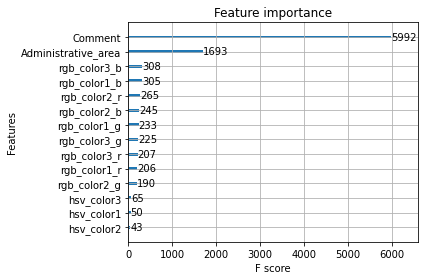

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.autolayout'] = True
plot_importance(xgb)
pyplot.show()

In [ ]:
feat_labels = df3.columns[1:]

In [ ]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Comment                        0.146621
 2) rgb_color1_b                   0.077618
 3) rgb_color2_b                   0.077008
 4) rgb_color3_b                   0.076748
 5) rgb_color2_r                   0.076584
 6) rgb_color1_r                   0.076383
 7) rgb_color3_r                   0.076347
 8) rgb_color3_g                   0.075736
 9) rgb_color1_g                   0.075108
10) rgb_color2_g                   0.074872
11) Administrative_area            0.074213
12) hsv_color3                     0.031407
13) hsv_color2                     0.031286
14) hsv_color1                     0.030070


In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Comment                        0.739797
 2) Administrative_area            0.216953
 3) rgb_color1_g                   0.006100
 4) rgb_color2_r                   0.005072
 5) rgb_color3_g                   0.004464
 6) rgb_color2_b                   0.004286
 7) rgb_color3_b                   0.004193
 8) rgb_color1_r                   0.003778
 9) rgb_color1_b                   0.003608
10) rgb_color3_r                   0.003319
11) hsv_color2                     0.002822
12) hsv_color3                     0.001953
13) hsv_color1                     0.001861
14) rgb_color2_g                   0.001794


<Figure size 864x432 with 0 Axes>

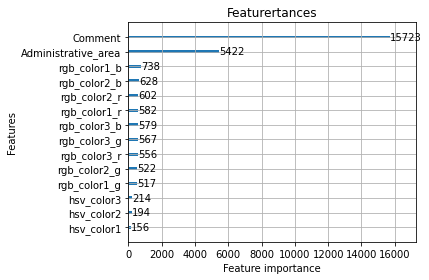

In [ ]:
plt.figure(figsize=(12,6))
lgb.plot_importance(gbm, max_num_features=30)
plt.title("Featurertances")
plt.show()

# 去除評論數

In [ ]:
df5 = df3

In [ ]:
df5 = df5.drop(['Comment'], axis=1)

In [ ]:
df5

,星級,Administrative_area,hsv_color1,hsv_color2,hsv_color3,rgb_color1_r,rgb_color1_g,rgb_color1_b,rgb_color2_r,rgb_color2_g,rgb_color2_b,rgb_color3_r,rgb_color3_g,rgb_color3_b
0,5,0,9,8,0,138.01,119.11,102.89,188.25,177.90,172.01,41.58,32.90,30.81
1,0,0,1,0,0,32.55,31.14,28.14,181.14,178.08,168.29,104.82,90.09,76.53
2,0,0,0,9,0,37.03,40.86,28.80,219.81,208.36,193.72,172.28,147.77,89.23
3,0,0,0,0,0,200.02,187.85,172.42,38.53,29.41,21.64,137.73,105.86,64.36
4,0,0,9,1,9,215.02,200.57,172.37,49.13,36.16,27.02,137.53,115.76,82.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10441,7,16,0,0,9,187.72,190.12,187.00,51.57,49.87,51.62,137.08,123.07,98.35
10442,7,16,0,0,0,130.97,124.25,106.26,54.57,42.77,23.96,170.31,191.40,206.08
10443,7,16,0,9,0,81.75,46.00,14.41,215.23,191.68,176.46,156.34,121.51,55.33
10444,7,16,0,0,1,227.33,217.65,189.31,84.17,33.38,18.47,190.91,130.69,51.46


In [ ]:
data1 = df5.drop(["星級"], axis=1) #剔除 y
X = data1 
y = df5.星級 #選擇 y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
lg = LogisticRegression(C=1.0, tol=1e-6, multi_class='multinomial', solver='newton-cg',max_iter=200)
lg.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(lg.score(X_test, y_test)))
print(lg.score(X_test, y_test))
print ("\n\n ---邏輯回歸---")

在測試數據集上的預測準確率: 0.21
0.20516911295469048


 ---邏輯回歸---


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
xgb = XGBClassifier(
    #深度
    max_depth=6, 
    #疊帶次數
    n_estimators=300,
    #學習數率
    learn_rate =0.001,
    objective = 'multi:softmax',
    num_class=9)
xgb.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(xgb.score(X_test,y_test)))
print(xgb.score(X_test, y_test))
print ("\n\n ---xgboost---")

在測試數據集上的預測準確率: 0.22
0.21857051691129548


 ---xgboost---


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(rf_clf.score(X_test,y_test)))
print(rf_clf.score(X_test, y_test))
print ("\n\n ---隨機森林---")

在測試數據集上的預測準確率: 0.21
0.20835992342054882


 ---隨機森林---


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(tree_clf.score(X_test,y_test)))
print(tree_clf.score(X_test, y_test))
print ("\n\n ---決策樹---")

在測試數據集上的預測準確率: 0.19
0.18953414167198468


 ---決策樹---


In [ ]:
gbm = lgb.LGBMClassifier(objective = 'multiclass',num_class=9,learning_rate = 0.05,n_estimators = 100,random_state=0)
gbm.fit(X_train, y_train)
print(gbm.score(X_test, y_test))
print('在測試數據集上的預測準確率: {:.2f}'.format(gbm.score(X_test,y_test)))

0.22750478621569878
在測試數據集上的預測準確率: 0.23


# 更換y

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/paper/code/original_data/mix_googlemap_and_no_choose_photo_color.csv')

In [ ]:
df1 = df[['color','hsv_color','星級','評論','行政區']]
color = df1['color']
color_list = []
rgb_color1_r = []
rgb_color1_g = []
rgb_color1_b = []
rgb_color2_r = []
rgb_color2_g = []
rgb_color2_b = []
rgb_color3_r = []
rgb_color3_g = []
rgb_color3_b = []
for i in color:
    clean = i.replace('[[','').replace(' [','').replace(']','').replace(' ','').split(',')
    for j in clean:
        color_list.append(j)
for c1 in range(0,len(color_list),9):
    rgb_color1_r.append(float(color_list[c1]))
for c2 in range(1,len(color_list),9):
    rgb_color1_g.append(float(color_list[c2]))
for c3 in range(2,len(color_list),9):
    rgb_color1_b.append(float(color_list[c3]))
for c4 in range(3,len(color_list),9):
    rgb_color2_r.append(float(color_list[c4]))
for c5 in range(4,len(color_list),9):
    rgb_color2_g.append(float(color_list[c5]))
for c6 in range(5,len(color_list),9):
    rgb_color2_b.append(float(color_list[c6]))
for c7 in range(6,len(color_list),9):
    rgb_color3_r.append(float(color_list[c7]))
for c8 in range(7,len(color_list),9):
    rgb_color3_g.append(float(color_list[c8]))
for c9 in range(8,len(color_list),9):
    rgb_color3_b.append(float(color_list[c9]))

In [ ]:
df1['rgb_color1_r'] = rgb_color1_r
df1['rgb_color1_g'] = rgb_color1_g
df1['rgb_color1_b'] = rgb_color1_b
df1['rgb_color2_r'] = rgb_color2_r
df1['rgb_color2_g'] = rgb_color2_g
df1['rgb_color2_b'] = rgb_color2_b
df1['rgb_color3_r'] = rgb_color3_r
df1['rgb_color3_g'] = rgb_color3_g
df1['rgb_color3_b'] = rgb_color3_b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
hsv_color = df1['hsv_color']
hsv_color_list = []
hsv_color1 = []
hsv_color2 = []
hsv_color3 = []
for i in hsv_color:
    hsv_clean = i.replace("['", '').replace("'", '').replace("]", '').replace(' ', '').split(',')
    for k in hsv_clean:
        hsv_color_list.append(k)
for u in range(0,len(hsv_color_list),3):
    hsv_color1.append(hsv_color_list[u])
for u in range(1,len(hsv_color_list),3):
    hsv_color2.append(hsv_color_list[u])
for u in range(2,len(hsv_color_list),3):
    hsv_color3.append(hsv_color_list[u])

In [ ]:
df1['hsv_color1'] = hsv_color1
df1['hsv_color2'] = hsv_color2
df1['hsv_color3'] = hsv_color3

In [ ]:
df2 =df1.drop(['color','hsv_color'], axis=1)

In [ ]:
labelencoder = LabelEncoder()
df2['行政區'] = labelencoder.fit_transform(df2['行政區'])
df2['hsv_color1'] = labelencoder.fit_transform(df2['hsv_color1'])
df2['hsv_color2'] = labelencoder.fit_transform(df2['hsv_color2'])
df2['hsv_color3'] = labelencoder.fit_transform(df2['hsv_color3'])

In [ ]:
df2['星級']=df2['星級'].astype(str).replace('4.1','0').replace('4.2','0').replace('4.3','0').replace('4.3','0').replace\
('4.4','0').replace('4.5','1').replace('4.6','1').replace('4.7','1').replace('4.8','1').replace('4.9','1')
df2['星級']=df2['星級'].astype(int)

In [ ]:
df2.rename(columns={'評論': 'Comment','行政區':'Administrative_area'}, inplace=True)

In [ ]:
df2 = df2.drop(['Comment'], axis=1)

In [ ]:
df2

,星級,Administrative_area,rgb_color1_r,rgb_color1_g,rgb_color1_b,rgb_color2_r,rgb_color2_g,rgb_color2_b,rgb_color3_r,rgb_color3_g,rgb_color3_b,hsv_color1,hsv_color2,hsv_color3
0,1,0,138.018965,119.112455,102.890825,188.259172,177.909465,172.014798,41.588127,32.907300,30.816535,9,8,0
1,0,0,32.558143,31.146338,28.148720,181.140879,178.080359,168.291001,104.827952,90.094104,76.532580,1,0,0
2,0,0,37.037390,40.863343,28.806965,219.810475,208.363699,193.728042,172.283769,147.773632,89.230597,0,9,0
3,0,0,200.025852,187.859231,172.422216,38.536858,29.412335,21.640431,137.736435,105.867856,64.361770,0,0,0
4,0,0,215.027711,200.570823,172.371465,49.132519,36.165505,27.022709,137.532042,115.764864,82.344907,9,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10441,1,16,187.727768,190.123246,187.009855,51.578352,49.874537,51.629518,137.086083,123.072035,98.358461,0,0,9
10442,1,16,130.977024,124.252426,106.267264,54.572830,42.772612,23.968882,170.319444,191.401570,206.081522,0,0,0
10443,1,16,81.754422,46.003568,14.412517,215.230174,191.682332,176.464769,156.345821,121.517794,55.338679,0,9,0
10444,1,16,227.333485,217.658759,189.313412,84.172717,33.389671,18.470843,190.917478,130.694280,51.463486,0,0,1


In [ ]:
data1 = df2.drop(["星級"], axis=1) #剔除 y
X = data1 
y = df2.星級 #選擇 y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
lg = LogisticRegression(C=0.01,solver = 'sag')
lg.fit(X_train,y_train)
y_score = lg.fit(X_train,y_train).decision_function(X_test)
print('在測試數據集上的預測準確率: {:.2f}'.format(lg.score(X_test, y_test)))
print(lg.score(X_test, y_test))
print ("\n\n ---邏輯回歸---")

在測試數據集上的預測準確率: 0.71
0.7067645181876197


 ---邏輯回歸---


In [ ]:
xgb = XGBClassifier(
    #深度
    max_depth=3, 
    #疊帶次數
    n_estimators=200,
    #學習數率
    learn_rate=0.01)
xgb.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(xgb.score(X_test,y_test)))
print(xgb.score(X_test,y_test))
print ("\n\n ---xgboost---")

在測試數據集上的預測準確率: 0.70
0.7016592214422464


 ---xgboost---


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(rf_clf.score(X_test,y_test)))
print(rf_clf.score(X_test,y_test))
print ("\n\n ---隨機森林---")

在測試數據集上的預測準確率: 0.70
0.6968730057434588


 ---隨機森林---


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(tree_clf.score(X_test,y_test)))
print(tree_clf.score(X_test,y_test))
print ("\n\n ---決策樹---")

在測試數據集上的預測準確率: 0.59
0.5909380982769623


 ---決策樹---


In [ ]:
gbm = lgb.LGBMClassifier(objective = 'binary',learning_rate = 0.05,n_estimators = 100,random_state=0)
gbm.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(gbm.score(X_test,y_test)))
print(gbm.score(X_test,y_test))
print ("\n\n ---lightgbm---")

在測試數據集上的預測準確率: 0.70
0.7019783024888322


 ---lightgbm---


In [ ]:
coef_c1 = pd.DataFrame({'var' : pd.Series(X_test.columns),
                        'coef_abs' : abs(pd.Series(lg.coef_[0].flatten()))
                        })
coef_c1 = coef_c1.sort_values(by = 'coef_abs',ascending=False)
coef_c1.to_csv('tte.csv',index=False)
print(coef_c1)
print(type(coef_c1))

                    var  coef_abs
10           hsv_color1  0.021681
0   Administrative_area  0.009940
2          rgb_color1_g  0.002974
9          rgb_color3_b  0.002275
4          rgb_color2_r  0.002046
12           hsv_color3  0.002046
7          rgb_color3_r  0.001877
6          rgb_color2_b  0.001755
5          rgb_color2_g  0.001337
11           hsv_color2  0.001149
8          rgb_color3_g  0.000690
1          rgb_color1_r  0.000384
3          rgb_color1_b  0.000086
<class 'pandas.core.frame.DataFrame'>


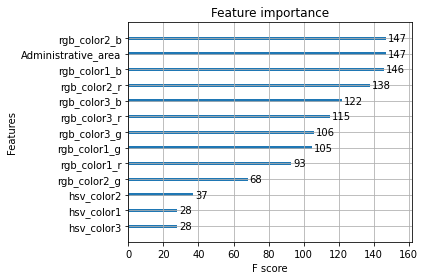

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.autolayout'] = True
plot_importance(xgb)
pyplot.show()

In [ ]:
feat_labels = df2.columns[1:]

In [ ]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) rgb_color3_r                   0.096003
 2) rgb_color3_b                   0.095711
 3) rgb_color3_g                   0.095598
 4) rgb_color2_b                   0.095508
 5) rgb_color1_b                   0.095315
 6) rgb_color2_r                   0.095245
 7) rgb_color1_g                   0.092902
 8) rgb_color1_r                   0.092672
 9) rgb_color2_g                   0.092210
10) Administrative_area            0.060664
11) hsv_color3                     0.029872
12) hsv_color2                     0.029303
13) hsv_color1                     0.028998


In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) rgb_color2_b                   0.112642
 2) rgb_color3_b                   0.110480
 3) rgb_color3_r                   0.109061
 4) rgb_color1_r                   0.100005
 5) rgb_color2_r                   0.095935
 6) rgb_color1_g                   0.090185
 7) rgb_color3_g                   0.087396
 8) rgb_color2_g                   0.086346
 9) rgb_color1_b                   0.079798
10) Administrative_area            0.045612
11) hsv_color1                     0.032357
12) hsv_color2                     0.025774
13) hsv_color3                     0.024409


<Figure size 864x432 with 0 Axes>

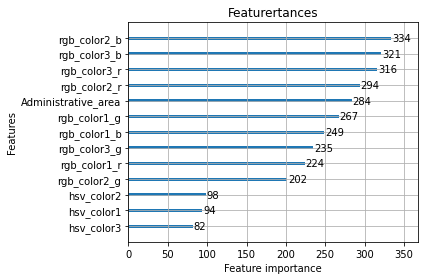

In [ ]:
plt.figure(figsize=(12,6))
lgb.plot_importance(gbm, max_num_features=30)
plt.title("Featurertances")
plt.show()

# 更改y成三個

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/paper/code/original_data/mix_googlemap_and_no_choose_photo_color.csv')

In [ ]:
df1 = df[['color','hsv_color','星級','評論','行政區']]
color = df1['color']
color_list = []
rgb_color1_r = []
rgb_color1_g = []
rgb_color1_b = []
rgb_color2_r = []
rgb_color2_g = []
rgb_color2_b = []
rgb_color3_r = []
rgb_color3_g = []
rgb_color3_b = []
for i in color:
    clean = i.replace('[[','').replace(' [','').replace(']','').replace(' ','').split(',')
    for j in clean:
        color_list.append(j)
for c1 in range(0,len(color_list),9):
    rgb_color1_r.append(float(color_list[c1]))
for c2 in range(1,len(color_list),9):
    rgb_color1_g.append(float(color_list[c2]))
for c3 in range(2,len(color_list),9):
    rgb_color1_b.append(float(color_list[c3]))
for c4 in range(3,len(color_list),9):
    rgb_color2_r.append(float(color_list[c4]))
for c5 in range(4,len(color_list),9):
    rgb_color2_g.append(float(color_list[c5]))
for c6 in range(5,len(color_list),9):
    rgb_color2_b.append(float(color_list[c6]))
for c7 in range(6,len(color_list),9):
    rgb_color3_r.append(float(color_list[c7]))
for c8 in range(7,len(color_list),9):
    rgb_color3_g.append(float(color_list[c8]))
for c9 in range(8,len(color_list),9):
    rgb_color3_b.append(float(color_list[c9]))

In [ ]:
df1['rgb_color1_r'] = rgb_color1_r
df1['rgb_color1_g'] = rgb_color1_g
df1['rgb_color1_b'] = rgb_color1_b
df1['rgb_color2_r'] = rgb_color2_r
df1['rgb_color2_g'] = rgb_color2_g
df1['rgb_color2_b'] = rgb_color2_b
df1['rgb_color3_r'] = rgb_color3_r
df1['rgb_color3_g'] = rgb_color3_g
df1['rgb_color3_b'] = rgb_color3_b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
hsv_color = df1['hsv_color']
hsv_color_list = []
hsv_color1 = []
hsv_color2 = []
hsv_color3 = []
for i in hsv_color:
    hsv_clean = i.replace("['", '').replace("'", '').replace("]", '').replace(' ', '').split(',')
    for k in hsv_clean:
        hsv_color_list.append(k)
for u in range(0,len(hsv_color_list),3):
    hsv_color1.append(hsv_color_list[u])
for u in range(1,len(hsv_color_list),3):
    hsv_color2.append(hsv_color_list[u])
for u in range(2,len(hsv_color_list),3):
    hsv_color3.append(hsv_color_list[u])

In [ ]:
df1['hsv_color1'] = hsv_color1
df1['hsv_color2'] = hsv_color2
df1['hsv_color3'] = hsv_color3

In [ ]:
df2 =df1.drop(['color','hsv_color'], axis=1)

In [ ]:
labelencoder = LabelEncoder()
df2['行政區'] = labelencoder.fit_transform(df2['行政區'])
df2['hsv_color1'] = labelencoder.fit_transform(df2['hsv_color1'])
df2['hsv_color2'] = labelencoder.fit_transform(df2['hsv_color2'])
df2['hsv_color3'] = labelencoder.fit_transform(df2['hsv_color3'])

In [ ]:
df2['星級']=df2['星級'].astype(str).replace('4.1','1').replace('4.2','1').replace('4.3','1').replace('4.3','1').replace\
('4.4','2').replace('4.5','2').replace('4.6','2').replace('4.7','3').replace('4.8','3').replace('4.9','3')
df2['星級']=df2['星級'].astype(int)

In [ ]:
df2.rename(columns={'評論': 'Comment','行政區':'Administrative_area'}, inplace=True)

In [ ]:
df2 = df2.drop(['Comment'], axis=1)

In [ ]:
data1 = df2.drop(["星級"], axis=1) #剔除 y
X = data1 
y = df2.星級 #選擇 y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
lg = LogisticRegression(C=1.0, tol=1e-6, multi_class='multinomial', solver='newton-cg')
lg.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(lg.score(X_test, y_test)))
print(lg.score(X_test, y_test))
print ("\n\n ---邏輯回歸---")

在測試數據集上的預測準確率: 0.57
0.5689215060625399


 ---邏輯回歸---


In [ ]:
xgb = XGBClassifier(
    #深度
    max_depth=3, 
    #疊帶次數
    n_estimators=200,
    #學習數率
    learn_rate=0.01)
xgb.fit(X_train,y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(xgb.score(X_test,y_test)))
print(xgb.score(X_test,y_test))
print ("\n\n ---xgboost---")

在測試數據集上的預測準確率: 0.57
0.5682833439693682


 ---xgboost---


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(rf_clf.score(X_test,y_test)))
print(rf_clf.score(X_test,y_test))
print ("\n\n ---隨機森林---")

在測試數據集上的預測準確率: 0.55
0.5500957243139758


 ---隨機森林---


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(tree_clf.score(X_test,y_test)))
print(tree_clf.score(X_test,y_test))
print ("\n\n ---決策樹---")

在測試數據集上的預測準確率: 0.46
0.4623484365028717


 ---決策樹---


In [ ]:
gbm = lgb.LGBMClassifier(objective = 'binary',learning_rate = 0.05,n_estimators = 100,random_state=0)
gbm.fit(X_train, y_train)
print('在測試數據集上的預測準確率: {:.2f}'.format(gbm.score(X_test,y_test)))
print(gbm.score(X_test,y_test))
print ("\n\n ---lightgbm---")

在測試數據集上的預測準確率: 0.57
0.5698787492022974


 ---lightgbm---
